<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana11/MediaMovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import pandas as pd

In [6]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana11')
!ls

Data  MediaMovil.ipynb


In [10]:
data = pd.read_csv('Data/MediaMovilData.csv')
data

,Ventas
0,1250
1,1150
2,970
3,1100
4,1170
5,1080
6,1120
7,1230
8,1210
9,1050


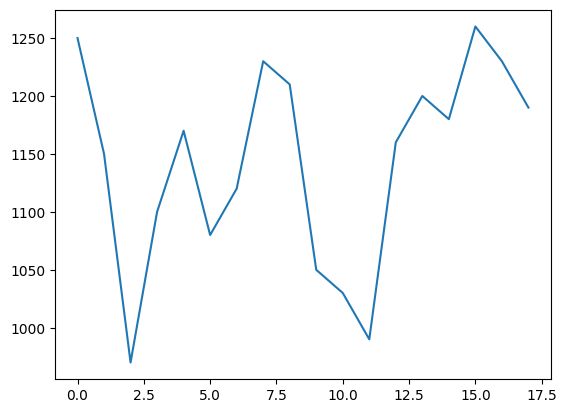

In [12]:
# COntexto: ventas en dolares de un almacen durando 18 dias
# Tarea: Elaborar un modelo que prediga la venta en el día 19
# Modelo: Definimos un modelo: Alejandro dice "sencillo - regresion"
import matplotlib.pyplot as plt
import numpy as np
x = np.array((data.Ventas))
plt.plot(x)

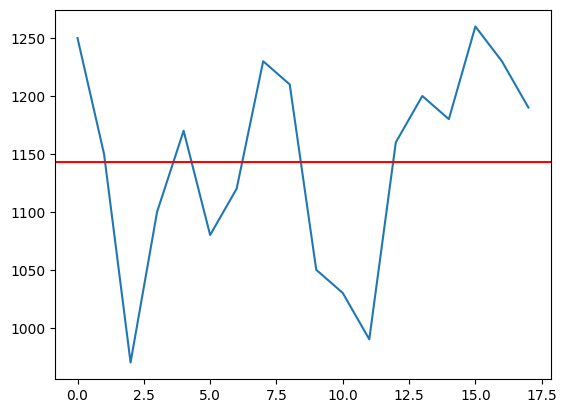

In [14]:
# estudiante de primer semestre
mean = np.mean(data.Ventas)
plt.plot(x)
plt.axhline(y=mean, color='r', linestyle='-')

In [15]:
# Queremos constriuir una media movil
def GetMediaMovil(x,n):

  media = np.zeros((len(x)+1)) # Incluyo la prediccion

  for i in range(len(media)):

    sum_ = 0.

    if i > n:

      for j in range(i-n,i):

        sum_ += x[j]

      media[i] = sum_/n

    else:
      media[i] = x[i]

  return media


In [29]:
media = GetMediaMovil(x,3)

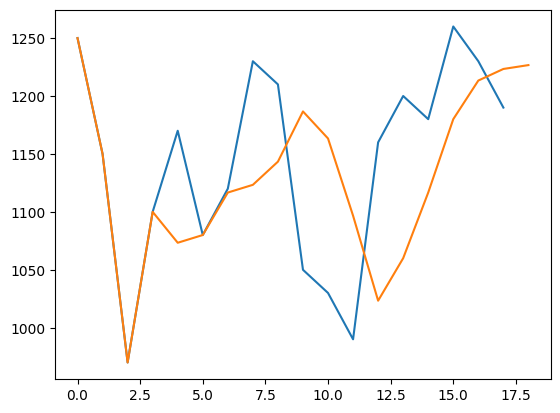

In [30]:
plt.plot(x)
plt.plot(media,label='media movil standard')

In [31]:
media[-1]

np.float64(1226.6666666666667)

In [32]:
# Media movil ponderada
# El vector de ponderacion
# SI metos 0.75,0.25
def GetMediaMovilPonderada(x,w):

  n = len(w)
  media = np.zeros((len(x)+1))

  for i in range(len(media)):

    sum_ = 0.

    if i >= n:

      k = 0
      for j in range(i-n,i):

        sum_ += w[k]*x[j]

        k += 1

      media[i] = sum_

    else:
      media[i] = x[i]

  return media

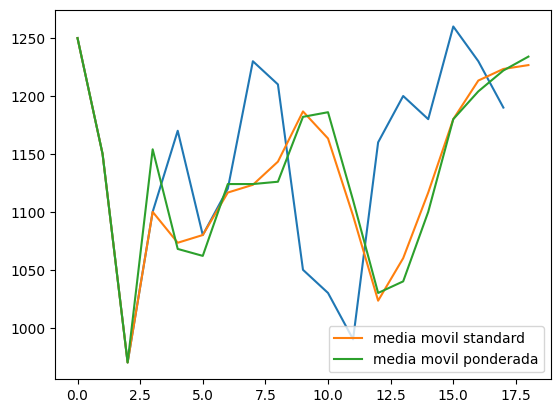

In [34]:
w = np.array([0.4,0.4,0.2])
Wmedia = GetMediaMovilPonderada(x,w)
plt.plot(x)
plt.plot(media,label='media movil standard')
plt.plot(Wmedia,label='media movil ponderada')
plt.legend()